In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk

# Linear Regression

### Normal Equation

$ \LARGE\hat\theta = (X^TX)^{-1}X^Ty $

Now let's generate some data for the analysis

In [14]:
import numpy as np

x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

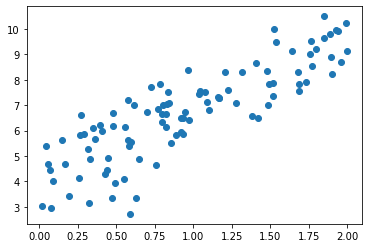

In [15]:
plt.scatter(x,y)

$ \LARGE\hat\theta = (X^TX)^{-1}X^Ty $

In [19]:
x_biased = np.c_[np.ones((100,1)),x] # add 1 to each x
theta_best = np.linalg.pinv(x_biased.T.dot(x_biased)).dot(x_biased.T).dot(y)

In [20]:
theta_best

array([[4.09475033],
       [2.73358836]])

In [22]:
# Now we can make new predictions by using thetabest

X_new = np.array([[0], [2]])
X_new_biased = np.c_[np.ones((2,1)),X_new]

In [23]:
y_pred = X_new_biased.dot(theta_best)
y_pred

array([[4.09475033],
       [9.56192704]])

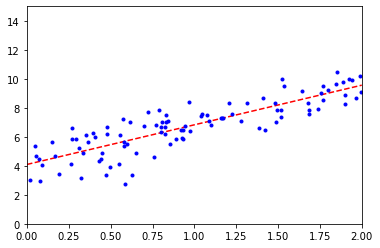

In [26]:
plt.plot(X_new, y_pred, "r--")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [27]:
# Performing LinearRegression with Scikit Learn is straightforward

from sklearn.linear_model import LinearRegression

lin_reg  = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.09475033]), array([[2.73358836]]))

In [28]:
lin_reg.predict(X_new)

array([[4.09475033],
       [9.56192704]])

The SVD approach used by Linear Regression algorithm of SK is O(n^2) and our normal equation is O(n^3) which is not preferred. On the positives side, they both are linear w.r.t number of instances in training set

Gradient Descent is better suited for cased where there a large number of features or too many training instances to fit in memory.

### Batch Gradient Descent

When using Gradient Descents, always ensure that all features have a similar scale for faster approximation. Otherwise too many time to converge.

$ \LARGE\Delta_\theta MSE(\theta) = \frac{2X^T(X\theta - y)}{m} $

In [32]:
lr = 0.7
num_iter = 1000
m = 100

theta = np.random.randn(2,1)

for iter in range(num_iter):
    gradients = 2 / m * x_biased.T.dot(x_biased.dot(theta) - y)
    theta = theta - lr * gradients

In [33]:
theta, theta_best

(array([[-1.11747941e+283],
        [-1.26626585e+283]]),
 array([[4.09475033],
        [2.73358836]]))

Stop when your gradient become very small $\LARGE \epsilon $ called tolerance, because it indicates Gradient Descent hasreached to a min. 

When the cost function is convex Batch Gradient Descent guarenteed to converge to a optimal solution and it can tke O(1 / $\Large\epsilon$).

### Stochastic Gradient Descent

Batch Descent uses whole data in one iteration, so go use SGD. In SGD pick a randm instance in the trainig set at every step and compute the gradient based only on the single instance. Obviously, working on a single instance at a time makes the algorithm much faster. 

Because it uses very small set of data it can work with huge datasets and it can works as an out-of-core as well.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm
is much less regular than Batch Gradient Descent: instead of gently
decreasing until it reaches the minimum, the cost function will bounce up
and down, decreasing only on average. So once algorithm stops, solution very close to optimal but not optimal

In [40]:
num_epochs = 50
t0,t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)
m = 100
theta = np.random.randn(2,1)

for epoch in range(num_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_ins = x_biased[random_index:random_index+1]
        y_ins = y[random_index:random_index+1]
        
        gradients = 2 * x_ins.T.dot(x_ins.dot(theta) - y_ins)
        lr = learning_schedule(epoch * m + i)
        theta = theta - lr * gradients

You may try to shuffle training set and pick with an order but experiments proved contrary. This approach generally converges more slowly.

When using SGD, training instances must be IID (indep, and identically distributed). So, at each epoch reshuffle

In [41]:
theta

array([[4.11012315],
       [2.76630409]])

### Polynomial Regression

In [72]:
poly_m = 100
poly_x = 6 * np.random.rand(poly_m, 1) - 3
poly_y = .5 * poly_x**2 + poly_x + 2 + np.random.randn(poly_m,1)


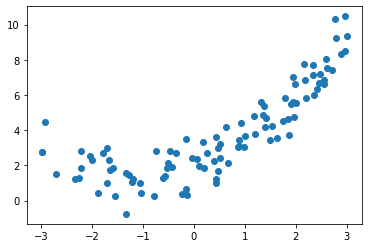

In [73]:
plt.scatter(poly_x, poly_y)

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias=False)

x_poly = poly_features.fit_transform(poly_x)
x_poly[0], poly_x[0]

(array([0.85889388, 0.73769869]), array([0.85889388]))

X_poly now contains original feature x and square of this feature.

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,poly_y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97082981]), array([[1.03332722, 0.46086055]]))

Polynomical Regression can also capture the relationship between the features. This is made possibly by the fact Polynomial Features also add all combinations of features up to the given degree.

$ a^3 , b^3 , ab, ab^2, a^2b $

**How do we decide which degree to use.**

During Cross Validation get an estimate. If model performs well on training and generalizes poorly according to cross validation then the model is overfitted. If both model and CV performs poorly then the model is underfittting.

Another option would be to plot learning curves

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2)
    train_errors, val_errors  = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
        
    plt.plot(np.sqrt(train_errors), 'r-+', label="train")
    plt.plot(np.sqrt(val_errors), 'b--', label="val")
    
    

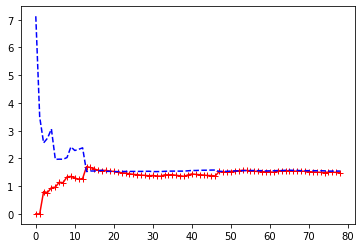

In [89]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, poly_x, poly_y)

Clearly, the above plot belongs to a underfitting model, so either you come up with more relevant features or change the model (more complex).

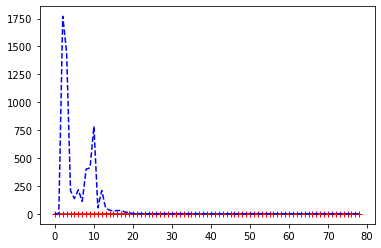

In [97]:
from sklearn.pipeline import Pipeline

polynomial_regression  = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, poly_x, poly_y)

One way to improve overfitting model is to feed it more training data until validation error catch up with training one.